In [2]:
import numpy as np
import pandas as pd
import pprint
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

In [3]:
iris_data=load_iris()
iris_data.data.shape
data_df=pd.DataFrame(iris_data.data,columns=[iris_data.feature_names])
data_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Standarding

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
X = iris_data.data
X_std_trans = StandardScaler().fit_transform(X)

# Covariance

In [6]:
X_covariance_matrix=np.cov(X.T)
X_covariance_matrix

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

# correlation

In [7]:
X_correlation_matrix=data_df.corr()
X_correlation_matrix


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


# Discribe


In [8]:
print(data_df[data_df.columns[0:4]].describe())

      sepal length (cm) sepal width (cm) petal length (cm) petal width (cm)
count        150.000000       150.000000        150.000000       150.000000
mean           5.843333         3.057333          3.758000         1.199333
std            0.828066         0.435866          1.765298         0.762238
min            4.300000         2.000000          1.000000         0.100000
25%            5.100000         2.800000          1.600000         0.300000
50%            5.800000         3.000000          4.350000         1.300000
75%            6.400000         3.300000          5.100000         1.800000
max            7.900000         4.400000          6.900000         2.500000


In [9]:
data_df.var()

sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64

# Mean

In [10]:
data_df.mean()

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

# 2.PCA

In [11]:
X_PCA_covariance_matrix = np.cov(X_std_trans.T)
X_PCA_covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

### Eigenvalues and Eigenvector

In [12]:
Eigenvalues, Eigenvectors = np.linalg.eig(X_PCA_covariance_matrix)
print('Eigenvalues:  \n', Eigenvalues)
print('Eigenvectors: \n', Eigenvectors)



Eigenvalues:  
 [2.93808505 0.9201649  0.14774182 0.02085386]
Eigenvectors: 
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [13]:

Eig_pairs = [(np.abs(Eigenvalues[i]), Eigenvectors[:,i]) for i in range(len(Eigenvalues))]

Eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Eigenvalues in descending order:')
for i in Eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.938085050199996
0.9201649041624885
0.147741821044948
0.020853862176462127


### total variation

In [14]:
total=sum(Eigenvalues)
variance_exp=[(i / total)*100 for i in sorted(Eigenvalues, reverse=True)]
print ("Variance captured by each component principal is \n",variance_exp)
Cumulative_variance_exp=np.cumsum(variance_exp)
print("==============================================================================")
print("Captures of total variation travel each component (%)\n",Cumulative_variance_exp)





Variance captured by each component principal is 
 [72.96244541329985, 22.85076178670178, 3.668921889282873, 0.5178709107154758]
Captures of total variation travel each component (%)
 [ 72.96244541  95.8132072   99.48212909 100.        ]


### Cal eigenvalue and plot principal component 

In [15]:
V_trans_matrix = np.hstack((Eig_pairs[0][1].reshape(4,1),
                      Eig_pairs[1][1].reshape(4,1)))
V_trans_matrix

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

### Two component principal

In [16]:
Y = X_std_trans.dot(V_trans_matrix)
Y[0:5]

array([[-2.26470281, -0.4800266 ],
       [-2.08096115,  0.67413356],
       [-2.36422905,  0.34190802],
       [-2.29938422,  0.59739451],
       [-2.38984217, -0.64683538]])

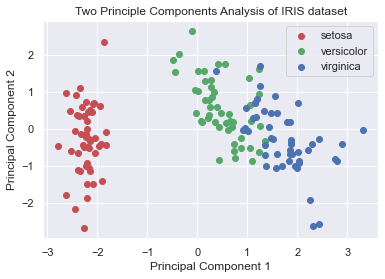

In [17]:

target_names_irisdata =  iris_data.target_names
y =  iris_data.target
for c, i, target_name in zip("rgb", [0, 1, 2], target_names_irisdata):
    plt.scatter(Y[y==i,0], Y[y==i,1], c=c, label=target_name)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('Two Principle Components Analysis of IRIS dataset')
plt.show()

### Three component principal

In [18]:
V1_trans_matrix = np.hstack((Eig_pairs[0][1].reshape(4,1),
                      Eig_pairs[1][1].reshape(4,1),
                      Eig_pairs[2][1].reshape(4,1)))
V1_trans_matrix



array([[ 0.52106591, -0.37741762, -0.71956635],
       [-0.26934744, -0.92329566,  0.24438178],
       [ 0.5804131 , -0.02449161,  0.14212637],
       [ 0.56485654, -0.06694199,  0.63427274]])

In [19]:
Y1 = X_std_trans.dot(V1_trans_matrix)
Y1[0:5]

array([[-2.26470281, -0.4800266 , -0.12770602],
       [-2.08096115,  0.67413356, -0.23460885],
       [-2.36422905,  0.34190802,  0.04420148],
       [-2.29938422,  0.59739451,  0.09129011],
       [-2.38984217, -0.64683538,  0.0157382 ]])

C:\Users\ADMIN\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


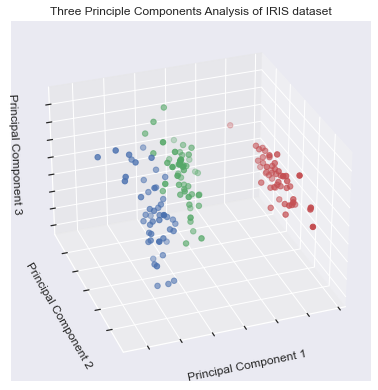

In [20]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(1, figsize=(5, 6))

target_names_irisdata =  iris_data.target_names
y =  iris_data.target
ax = Axes3D(fig, elev=-150, azim=110)
for c, i, target_name in zip("rgb", [0, 1, 2], target_names_irisdata):
    ax.scatter(Y1[y==i,0], Y1[y==i,1],  Y1[y==i,2],c=c, s=30,label=target_name)
ax.set_title("Three Principle Components Analysis of IRIS dataset")
ax.set_xlabel("Principal Component 1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Principal Component 2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Principal Component 3")
ax.w_zaxis.set_ticklabels([])


plt.show()

### Visualize data distribution in 2D.

Text(0, 0.5, 'Sepal width')

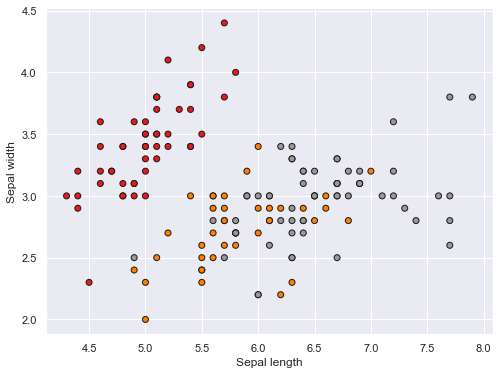

In [21]:

y_vi = iris_data.target
plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y_vi, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
